# Computer Modeling of Epidemics with the SIR Model

In this workbook we'll work through a simple model of how an epidemic spreads through a population. The model is called "SIR", because every individual in the population is assigned to one of three compartments:
\begin{align}
S &= \textrm{Susceptible} \\
I &= \textrm{Infected} \\
R &= \textrm{Removed (or Recovered)}
\end{align}

![susceptible -> infected -> removed](images/sir_flow.png)

The number of individuals in each "compartment" of the population changes as the epidemic spreads, according to a set of simple differential equations:

\begin{align}
\frac{dS}{dt} &= -\beta S(t) I(t) \\
\frac{dI}{dt} &= \beta S(t) I(t) - \gamma I(t) \\
\frac{dR}{dt} &= \gamma I(t)
\end{align}

Note that $\frac{dS}{dt} + \frac{dI}{dt} + \frac{dR}{dt} = 0$.

In [113]:
function update(current, v, dt)
    return current + v * dt
end

update (generic function with 2 methods)

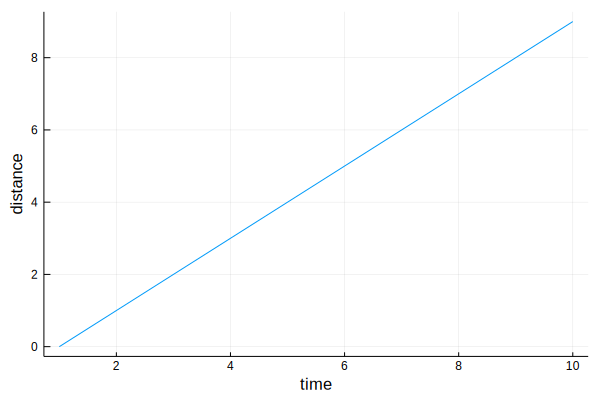

In [115]:
dt = 1.0
nsteps = 10
distance = Array{Float64}(undef, nsteps)
x = 0.0
dx = 1.0
for i = 1:nsteps
    distance[i] = x
    x = update(x, dx, dt)
end
plot(distance, xlabel="time", ylabel="distance", legend=false)

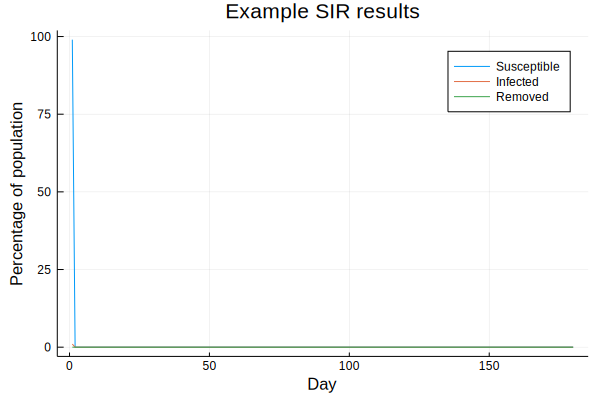

In [118]:
uninfected = 99
infected = 1
n = uninfected + infected

function update_SIR(current, beta, gam)
    return [0, 0, 0]
end

t_final = 180
dt = 1.0
n_steps = round(Int64, t_final / dt)
result = Array{Float64}(undef, n_steps+1, 3)
time = 1:n_steps

beta = 0.0021
gam = 0.1
result[1,:] = [uninfected, infected, 0.0]
for step = time
    new = update_SIR(result[step,:], beta, gam)
    result[step+1,1] = new[1]
    result[step+1,2] = new[2]
    result[step+1,3] = new[3]
end

using Plots
gr()
plot(time, result[1:n_steps,:], title="Example SIR results", xlabel="Day", ylabel="Percentage of population", labels = ["Susceptible" "Infected" "Removed"])

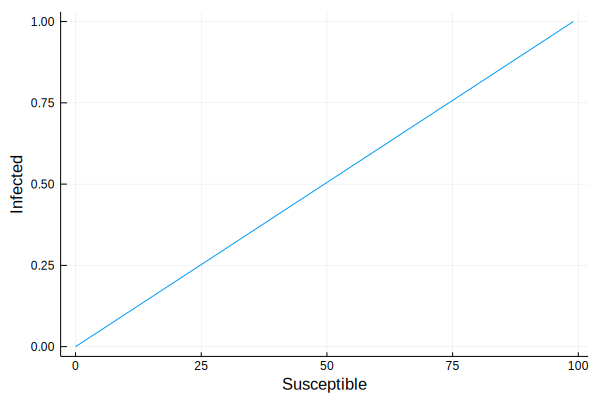

In [119]:
plot(result[:,1], result[:,2], xlabel="Susceptible", ylabel="Infected", legend=false)

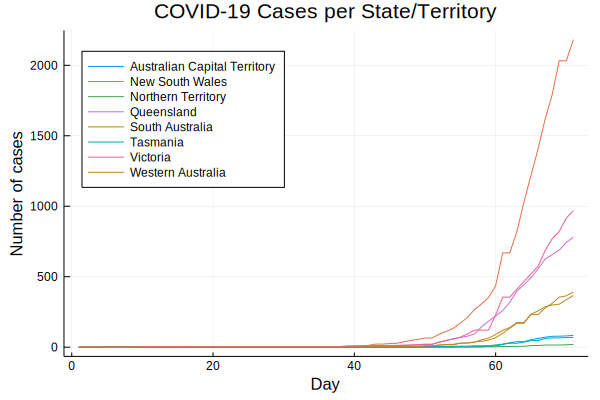

In [120]:
using CSV
x = CSV.read("au_covid.csv", transpose=true)
states = convert(Matrix, x)
state_names = reshape(String.(names(x)), 1, :)
plot(states, title="COVID-19 Cases per State/Territory", xlabel="Day", ylabel="Number of cases", labels=state_names, legend=:topleft)

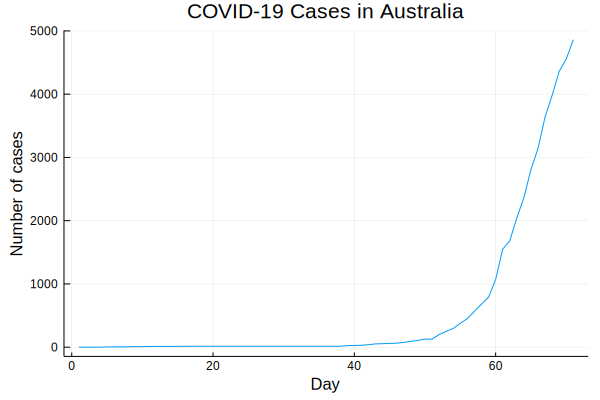

In [123]:
national=sum(states,dims=2)
plot(national,title="COVID-19 Cases in Australia", xlabel="Day", ylabel="Number of cases", legend=false)